# Statistical Learning - Tarea 1


### Realizado por Yurandir Santa Maria Santana Sandoval

### Instrucciones

El proyecto consiste en implementar gradient descent aplicado a regresión con base en el proyecto realizado en el cursos anterior de Ciencia de datos en Python, por lo que la primera parte será replicar dicho proyecto.



In [1]:
# En este paso se importan todas las librerías que van a ser de utilidad durante la elaboración del proyecto.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as Sci
import seaborn as sns

In [2]:
# Autorización de acceso de Google Colab a Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
"""
Carga del archivo que contiene los datos en formato binario de Numpy (.npy). 

Este archivo estaba guardado en el Google Drive asociado a mi cuenta, por lo que si alguien ajeno a mi desea compilar el código deberá modificar
la ruta de acceso. El archivo origial está disponible para descarga en el repositorio del proyecto en mi cuenta de Github.

"""

Database = np.load("/content/drive/My Drive/training_data.npy")



En este proyecto el 80% del dataset (rows) se usará para todo el proceso (análisis exploratorio, selección de variables a usar, crear modelos predictivos). A estos datos se les llamará "datos de entrenamiento"

El 20% restante del dataset (rows) se usará para probar ,validar y evaluar los modelos resultantes. A estos datos se les llamará “datos de validación y pruebas”

Este proyecto está basado en **La predicción de precios de casas** que suele ser utilizado como método de enseñanza de Python, por lo que las variables pueden ser definidas de las siguiente manera:

**y** = El precio de venta real de cierta casa.

**x** = Cierta característica de cierta casa.

**yhat** = f(x) = Precio estimado o predicción del precio de venta para una casa con cierta característica x.

**m** = pendiente de la recta que usamos para aproximar el precio de la casa yhat.

**b** = intercepto de la recta que usamos para aproximar el precio de la casa yhat.




### Slicing


* Entrenamiento - 80%.

* Validación y Pruebas - 20%.


**Atributos de database:**

* SalePrice
* overallQual
* 1stFlrSF
* TotRmsAbvGrd
* YearBuilt
* LotFrontage


In [4]:
lenght = len(Database)
Trainlenght = int(lenght*0.8)

train = np.nan_to_num(Database[:Trainlenght])
test = Database[Trainlenght:]
attribute_names = ['SalesPrice','OverallQual','FstFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']

Table1 = pd.DataFrame(train,columns=attribute_names)

print(Table1)

Ytrain = Database[:Trainlenght, 0]
Xtrain = Database[:Trainlenght, 1]
print("Entrenamiento: ", Ytrain.shape, Xtrain.shape)

      SalesPrice  OverallQual  FstFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0       208500.0          7.0     856.0           8.0     2003.0         65.0
1       181500.0          6.0    1262.0           6.0     1976.0         80.0
2       223500.0          7.0     920.0           6.0     2001.0         68.0
3       140000.0          7.0     961.0           7.0     1915.0         60.0
4       250000.0          8.0    1145.0           9.0     2000.0         84.0
...          ...          ...       ...           ...        ...          ...
1163    108959.0          4.0    1258.0           6.0     1969.0         60.0
1164    194000.0          5.0    1432.0           5.0     1978.0          0.0
1165    233170.0          7.0    1502.0           7.0     2009.0         79.0
1166    245350.0          8.0    1694.0           7.0     2008.0         64.0
1167    173000.0          6.0     959.0           7.0     2000.0         58.0

[1168 rows x 6 columns]
Entrenamiento:  (1168,) (1168,)


### Correlación Lineal

#### Coeficientes de correlación

In [ ]:
round(Table1.corr(method="pearson"),2)

,SalesPrice,OverallQual,FstFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalesPrice,1.00,0.79,0.62,0.56,0.53,0.23
OverallQual,0.79,1.00,0.47,0.44,0.57,0.17
FstFlrSF,0.62,0.47,1.00,0.41,0.29,0.23
TotRmsAbvGrd,0.56,0.44,0.41,1.00,0.12,0.21
YearBuilt,0.53,0.57,0.29,0.12,1.00,0.03
LotFrontage,0.23,0.17,0.23,0.21,0.03,1.00


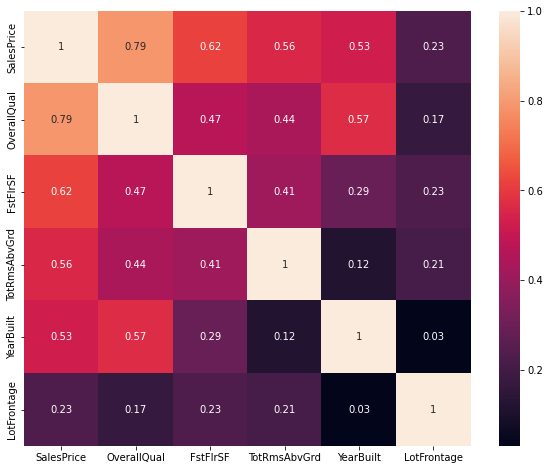

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(round(Table1.corr(method="pearson"),2), annot=True)
plt.show()

#### Elección de variables

La variable que con base en las gráficas de dispersión y el coeficiente de relación que se relaciona de manera más directa con la variable X (SalesPrice) es **OverallQual**.

#### Gráfica de correlación

#### Correlación entre Sales Price and Overall Qual

**Coeficiente de correlación: 0.79** - La relación es positiva, por lo que podemos inferir que las variables se relacionan directamente al tener un coeficiente mayor a 0.

Text(0, 0.5, 'OverallQual')

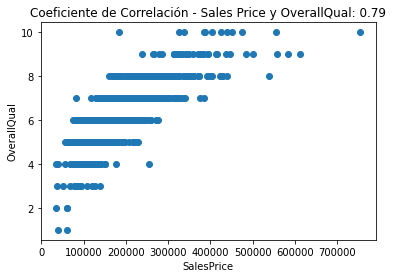

In [59]:
plt.title("Coeficiente de Correlación - Sales Price y OverallQual: "+ str(round(Table1["OverallQual"].corr(Table1['SalesPrice']),2)))

plt.scatter(data = Table1, x = "SalesPrice", y ="OverallQual")

plt.xlabel("SalesPrice")
plt.ylabel("OverallQual")

## Mini-batch gradient descent

In [61]:
import tensorflow as tf

print(tf.__version__)

2.8.2


In [ ]:
pip install tensorflow --upgrade

In [62]:
def h(m,b,x):

  """
  Modelo/hipotesis
  
  """

  y = m*x + b

  return y

def costo(y_real,y_aprox):

  """
  Funcion de costo/perdida/error

  Aplicando en esta ocasión: mean squared error(MSE)

  """
  return 1/2*tf.reduce_mean(tf.math.square(y_real - y_aprox) )

In [94]:
def ENTRModeloFinal(x, y, lr, epochs, batch_size):

  # Parámetros entrenables:

  m = tf.Variable(0.0)
  b = tf.Variable(0.0)

  #Almacenamiento del error de cada iteración:

  errores = []

  total_iteraciones = int(Trainlenght/batch_size)
  for epoch in range(epochs):

      # Numerosas iteraciones por epoch
      
      for i in range(total_iteraciones):
        muestra_inicio = i*batch_size
        muestra_fin = muestra_inicio + batch_size
        x_mb =  np.array(Xtrain[muestra_inicio:muestra_fin]).reshape([-1,1])
        y_mb = np.array(Ytrain[muestra_inicio:muestra_fin]).reshape([-1,1])

        with tf.GradientTape() as grad_tape:

          grad_tape.watch(b)
          grad_tape.watch(m)

          y_pred = h(m,b,x_mb)
          error = costo(y_mb,y_pred)

        # Cálculo del gradiente de la funcion de costo respecto de los parámetros:
        
        grad_m,grad_b = grad_tape.gradient(error,[m,b])

        # Actualización de los parametros dando un paso en direccion contraria al gradiente:

        m.assign(m - lr*grad_m)
        b.assign(b - lr*grad_b)

        # Almacenamiento o procesamiento de cualquier informacion relevante:

        errores.append(error.numpy())
    
    
        print("Iteración: {}, Error: {}".format(i,error))
        print("    Modelo:y={}x+{}".format(m.numpy(),b.numpy()))

  print("Modelo")

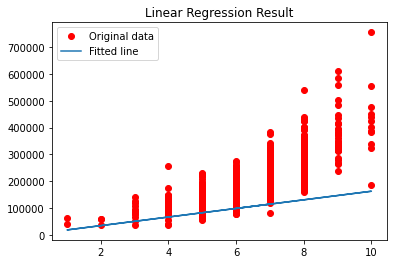

In [106]:
plt.plot(Xtrain, Ytrain, 'ro', label ='Original data')
plt.plot(Xtrain, y_pred, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()

## Hipótesis con base en la modificación de parámetros

Se realizarán 10 experimentos realizando cambios en la variable de learning rate.

*   1
*   0.1
*   0.01
*   0.001
*   0.0001

La hipótesis planteada contempla que los valores grandes del learning rate perjudicarían los cálculos, especialmente del error al tener saltos muy grandes. El caso contrario se esperaría de los valores más pequeños que necesitarían muchas más iteraciones para reflejar un resultado significativo.

### Learning Rate = 1

In [96]:
ModeloFinal= ENTRModeloFinal(Xtrain, Ytrain, lr=1, epochs=5, batch_size=1168)

Iteración: 0, Error: 19409719296.0
    Modelo:y=1187947.625x+180590.28125
Iteración: 0, Error: 27504106536960.0
    Modelo:y=-45198240.0x+-7067110.5
Iteración: 0, Error: 4.198736835746202e+16
    Modelo:y=1767255296.0x+275936288.0
Iteración: 0, Error: 6.41004987564572e+19
    Modelo:y=-69049835520.0x+-10781892608.0
Iteración: 0, Error: 9.785974312384855e+22
    Modelo:y=2697951444992.0x+421275074560.0
Modelo


### Learning Rate = 0.1

In [95]:
ModeloFinal= ENTRModeloFinal(Xtrain, Ytrain, lr=0.1, epochs=5, batch_size=1168)

Iteración: 0, Error: 19409719296.0
    Modelo:y=118794.765625x+18059.029296875
Iteración: 0, Error: 164311760896.0
    Modelo:y=-238151.828125x+-38164.859375
Iteración: 0, Error: 1474761326592.0
    Modelo:y=835574.1875x+129007.75
Iteración: 0, Error: 13325915127808.0
    Modelo:y=-2393093.75x+-375620.09375
Iteración: 0, Error: 120502555246592.0
    Modelo:y=7316618.0x+1140034.0
Modelo


### Learning Rate = 0.01

In [97]:
ModeloFinal= ENTRModeloFinal(Xtrain, Ytrain, lr=0.01, epochs=5, batch_size=1168)

Iteración: 0, Error: 19409719296.0
    Modelo:y=11879.4755859375x+1805.90283203125
Iteración: 0, Error: 7864249856.0
    Modelo:y=19001.5390625x+2868.9765625
Iteración: 0, Error: 3717770752.0
    Modelo:y=23272.6015625x+3486.900390625
Iteración: 0, Error: 2228494336.0
    Modelo:y=25835.130859375x+3838.06640625
Iteración: 0, Error: 1693499904.0
    Modelo:y=27373.779296875x+4029.380126953125
Modelo


### Learning Rate = 0.001

In [98]:
ModeloFinal= ENTRModeloFinal(Xtrain, Ytrain, lr=0.001, epochs=5, batch_size=1168)

Iteración: 0, Error: 19409719296.0
    Modelo:y=11879.4755859375x+1805.90283203125
Iteración: 0, Error: 7864249856.0
    Modelo:y=19001.5390625x+2868.9765625
Iteración: 0, Error: 3717770752.0
    Modelo:y=23272.6015625x+3486.900390625
Iteración: 0, Error: 2228494336.0
    Modelo:y=25835.130859375x+3838.06640625
Iteración: 0, Error: 1693499904.0
    Modelo:y=27373.779296875x+4029.380126953125
Modelo


### Learning Rate = 0.0001

In [104]:
ModeloFinal= ENTRModeloFinal(Xtrain, Ytrain, lr=0.0001, epochs=5, batch_size=1168)

Iteración: 0, Error: 19409719296.0
    Modelo:y=118.79476165771484x+18.05902671813965
Iteración: 0, Error: 19265628160.0
    Modelo:y=237.11378479003906x+36.04376983642578
Iteración: 0, Error: 19122688000.0
    Modelo:y=354.958984375x+53.95452880859375
Iteración: 0, Error: 18980888576.0
    Modelo:y=472.33221435546875x+71.7916030883789
Iteración: 0, Error: 18840223744.0
    Modelo:y=589.2354125976562x+89.55528259277344
Modelo


## Conclusiones

La evidencia de los cálculos de la función **Y = Mx + b** indican que según el valor del learning rate fue disminuyendo los valores fueron convergiendo de una mejor manera, pero sin representar grandes avances.